# Seguimiento espectroscópico de candidatos a binarias eclipsantes

---

**1)** La importancia de las *binarias eclipsantes* en astronomía es que gracias a su funcionamiento como sistema de 2 estrellas orbitando a un centro de masa, se puede corroborar la información acerca de estructura y evolución estelar.
Gracias a estos sistemas se puede calcular con gran exactitud el valor de sus masa, esto es así gracias a que se puede ocupar las leyes de kepler debido a sus orbitas. Además, como son eclipsantes gracias al transito que hay entre ellas es posible encontrar la razón de sus radios. También es posible encontrar el espectro de ambas al momento de tránsito de una sobre otra.

Fuentes:
> https://es.wikipedia.org/wiki/Estrella_binaria


**2)** Un espectrografo *Echelle* utiliza, en vez de un prisma, una red de disfracción con ranuras muy pequeñas, permitiendo una mayor difracción de la luz por lo que la resolución de éste es más alto que el de un espectrógrafo con prisma, además gracias a las pequeñas rendijas de disfracción, cada componente de la luz incidente se separa y se ordena en distintas lineas, dependiendo de la longitud de onda de esta componente. La utilidad que tiene este tipo de espectrografos en binarias, es que permite medir velocidades bajas debido a su alta resolución, por lo que se haría más fácil detectar el espectro de estas estrellas.

Fuentes:
>https://es.wikipedia.org/wiki/Red_de_difracci%C3%B3n

>http://www.astromia.com/fotohistoria/echelle.htm

**3)** Antes de pasar los datos por un algoritmo, las curvas de luz se limpiaron de efectos provocados por Mercurio y Venus pasando por el campo visual. Luego, para determinar candidatos, se analizó la curva de luz en distintas etapas, construyendo un modelo de curva de luz, encontrando
el mejor ajuste de mínimos cuadrados de la curva modelo a la curva real. La curva modelo tiene los mismos tiempos y errores que 
la curva de luz real y se hace lo siguiente:

- Se determina el periodo que se ajuste mejor, usando una forma sinusoidal.
- Se afina la determinación del periodo, ya que sino el resto del proceso se verá afectado gravemente. 
- Se determina la amplitud de la variabilidad antes y después de determinar la forma que mejor se ajusta.
- Determinar la forma de la variabilidad, que consisten en formas sinusoidales con distintas señales armónicas sobrepuestas. Se vuelve a calcular la amplitud después de esto, y si se encontró un modelo eclipsante que se ajusta bien, se calculan también la duración y la profundidad de los eclipses. 
- Si la mejor amplitud es cero, el modelo encontró que la estrella es constante. Si no es cero, hay que chequear la excentricidad y la amplitud del eclipse secundario. 


Luego de tener una lista inicial de candidatos, las estrellas en la vecindad de los candidatos a EB de baja masa fueron revisadas para evaluar si es que había contaminación de alguna EB conocida y brillante, lo cual descarta muchos candidatos. 

Otras configuraciones que generan falsos positivos, es que estamos buscando estrellas binarias eclipsantes, y no planetas que generen eclipses al transitar delante de su estrella, lo que genera una curva de luz similar a la de estrellas binarias; como se menciona en la parte anterior, las estrellas de fondo puden también pueden generar confusión y por lo tanto se descartan; y por otro lado, si la estrella principal es muy caliente comparada con la estrella secundaria, cuando la principal eclipse a la secundaria, puede que no se llegue a notar el eclipse. 

Ahora, de los 9 candidatos a binarias eclipsantes mencionadas en el paper de Wraight et al (2012), corroboré en simbad si efectivamente eran o no eclipsantes.

|     ID      | Ascención Recta(grados) | Declinación(grados) |   Estado del target   |
|:-----------:|:-----------------------:|:-------------------:|:---------------------:|
|   HD23765   |        57.1205          |       21.7975       |       Candidata       |
|   HD287039  |        71.5819          |       12.7448       |       Candidata       |
|   HD89849   |        155.541          |       6.21829       |       Candidata       |
|  BD-07 3648 |        203.727          |      -8.44247       |       Candidata       |
|   HD75767   |        133.068          |       8.06293       |Binaria espectroscópica|
|   HD198044  |        312.091          |      -22.7407       |       Candidata       |
|   HD205403  |        323.766          |      -3.7349        |       Candidata       |
|   HD213597  |        338.136          |       1.58245       |   Binaria Eclipsante  |
|   HD222891  |        356.162          |      -8.84879       |       Candidata       |

En la tabla anterior en la columna *Estado del target* se presenta si están confirmadas las binarias o si aun son candidatas. Concluyo de esto que debo trabajar con los 7 candidatos mostrados en la tabla.


Fuentes:
>https://ui.adsabs.harvard.edu/#abs/2012MNRAS.427.2298W/abstract

>http://simbad.u-strasbg.fr/simbad/sim-fbasic

4) 

In [3]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

RA = [["57.1205","HD23765"],["71.5819","HD287039"],["155.541","HD89849"],["203.727","BD-07 3648"],["312.091","HD198044"],["323.766","HD205403"],["356.162","HD222891"]]
DEC = [["21.7975","HD23765"],["12.7448","HD287039"],["6.21829","HD89849"],["-8.44247","BD-07 3648"],["-22.7407","HD198044"],["-3.7349","HD205403"],["-8.84879","HD222891"]]

#ingreso coordenadas del observatorio Santa Martina
SantaMartina = ephem.Observer()
SantaMartina.lon =  ephem.degrees('289.4656')
SantaMartina.lat = ephem.degrees('-33.2692')
#SantaMartina.date = '2016/10/31 21:00:00'
SantaMartina.elevation = 1450
star = ephem.FixedBody()
for k in range(7): #Selecciono los candidatos.
    SantaMartina.date = '2016/10/30 20:00:00'
    star._ra = ephem.degrees(RA[k][0])
    star._dec = ephem.degrees(DEC[k][0])
#determino los días en los que voy a observar, que van a ser 9 días ya que los días hábiles serán 3 por semanas durante 3 semanas.
    print "_______",RA[k][1],"_______"
    for i in range(7):
        SantaMartina.date += ephem.hour * 72
        for j in range(4): #voy recorriendo las horas.
            SantaMartina.date += ephem.minute * 60
            star.compute(SantaMartina)
            if star.alt > ephem.degrees('33:00:00'):
                print star.alt, SantaMartina.date    
        SantaMartina.date -= ephem.minute * 60 * 4
    

Populating the interactive namespace from numpy and matplotlib
_______ HD23765 _______
_______ HD287039 _______
_______ HD89849 _______
_______ BD-07 3648 _______
_______ HD198044 _______
65:21:50.1 2016/11/2 21:00:00
76:04:42.2 2016/11/2 22:00:00
78:36:24.3 2016/11/2 23:00:00
69:36:20.2 2016/11/3 00:00:00
67:40:32.4 2016/11/5 21:00:00
77:36:31.2 2016/11/5 22:00:00
77:24:41.3 2016/11/5 23:00:00
67:20:55.8 2016/11/6 00:00:00
69:55:18.1 2016/11/8 21:00:00
78:44:19.7 2016/11/8 22:00:00
75:50:03.4 2016/11/8 23:00:00
65:01:45.7 2016/11/9 00:00:00
72:04:32.3 2016/11/11 21:00:00
79:20:23.9 2016/11/11 22:00:00
73:59:18.1 2016/11/11 23:00:00
62:39:52.0 2016/11/12 00:00:00
74:05:54.0 2016/11/14 21:00:00
79:19:19.2 2016/11/14 22:00:00
71:57:24.9 2016/11/14 23:00:00
60:15:58.4 2016/11/15 00:00:00
75:55:53.7 2016/11/17 21:00:00
78:41:16.6 2016/11/17 22:00:00
69:47:49.0 2016/11/17 23:00:00
57:50:37.1 2016/11/18 00:00:00
77:29:26.0 2016/11/20 21:00:00
77:31:54.4 2016/11/20 22:00:00
67:32:47.9 2016/11

La altura de cada candidata a binaria eclipsante debe estar por sobre los 33°, esto es así ya que el telescopio no inclinarse a más de 80 grados, además, cerca del horizonte las masas de aires son mayores a 1 por lo que se hace poco recomendable observar a esa altura. 

El programa me arroja solo los candidatos visibles y estos son los siguientes:
- HD 198044
- HD 205403
- HD 222891

Fuentes:

>www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&ved=0ahUKEwi6saKSrorQAhWHlZAKHarbAe0QFggoMAI&url=http%3A%2F%2Fstackoverflow.com%2Fquestions%2F6870743%2Fcalculation-star-position-in-the-sky-pyephem&usg=AFQjCNEdWv6zcg7Ck4kFZF1XXt011jKhXg&sig2=f4IhvkO44JHoF3VMviD6aA

>http://rhodesmill.org/pyephem/tutorial.html

In [4]:
def paraaltura(string):
    h=float(string[:2])
    m=float(string[3:5])
    s=float(string[6:])
    tiempo=h+m/60+s/3600
    return tiempo        

In [5]:
def trans(string):
    a=''
    b=0
    i=0
    count=0
    for c in string:
        a=a+c
        if c==':':
            a=a.replace(":", "")
            b=float(a)
            i+=1
            if i==1:
                h=b
                a=''
            if i==2:
                m=b
                a=''
        count+=1
        if count==8:
            s=float(a)
    transform=h+m/60+s/3600
    return transform

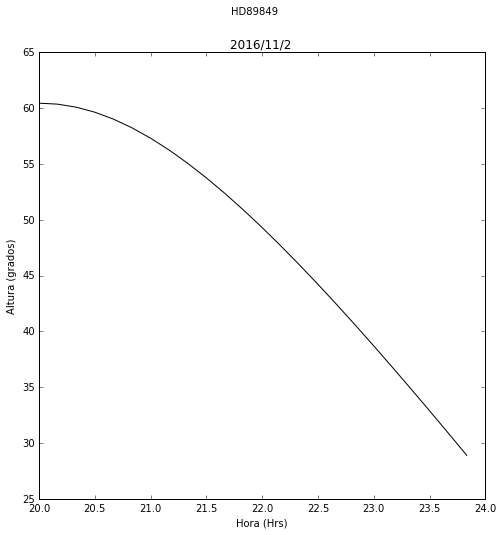

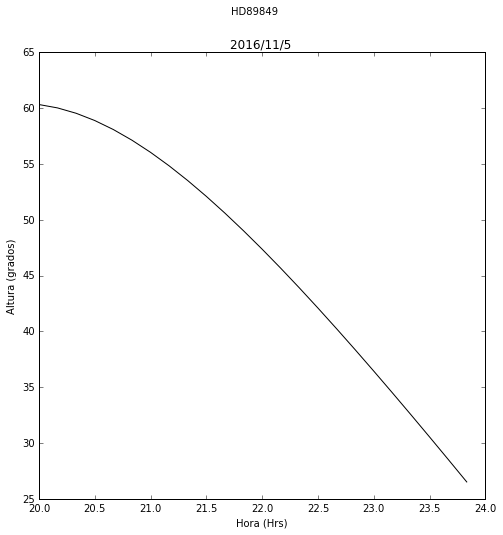

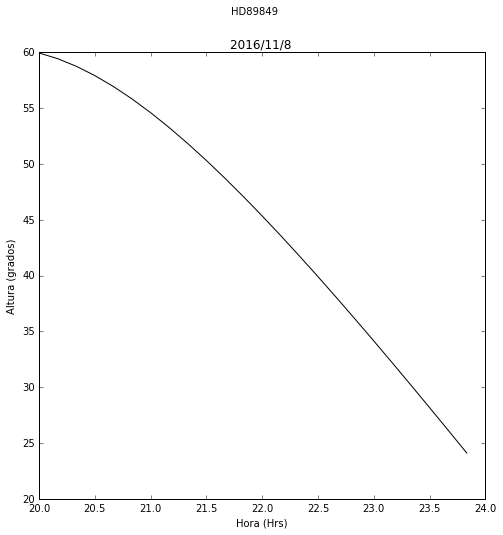

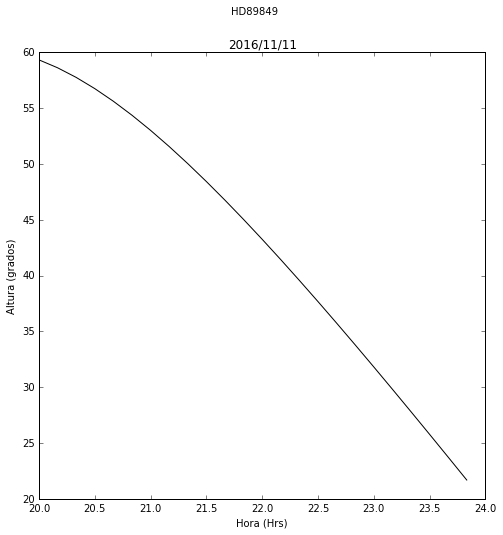

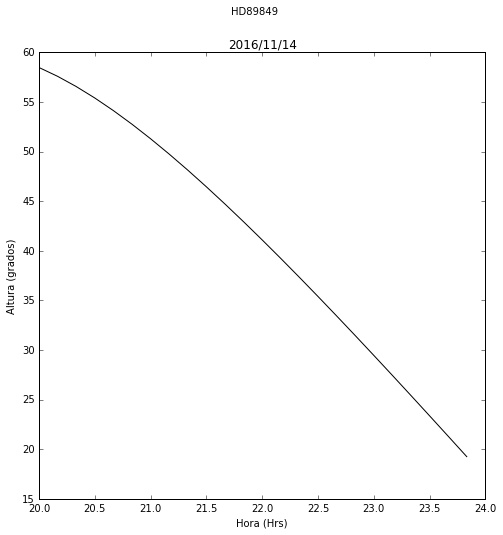

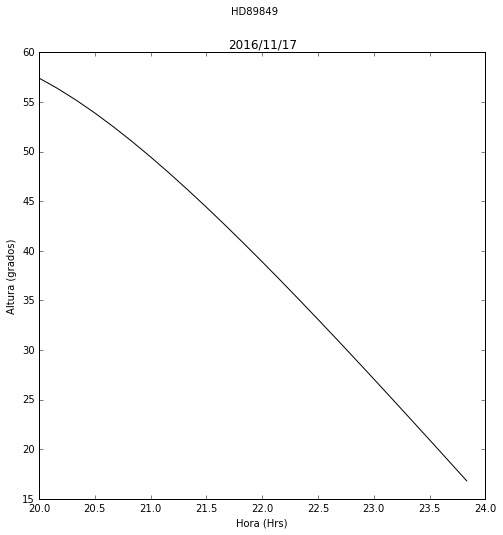

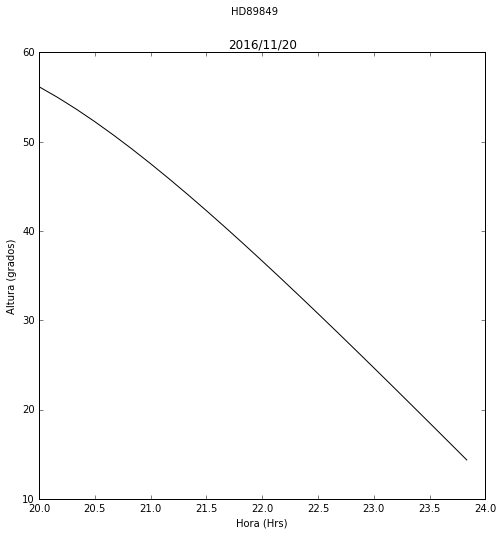

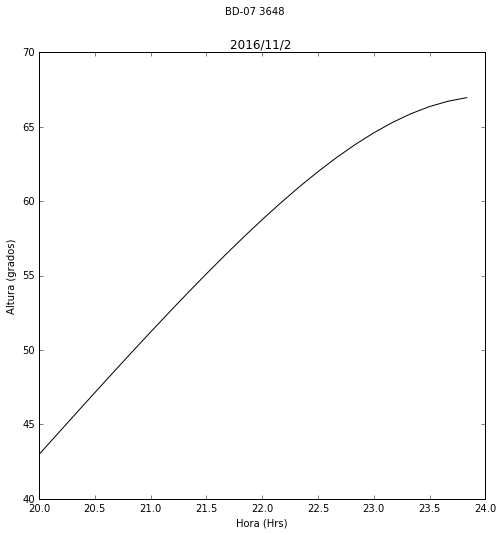

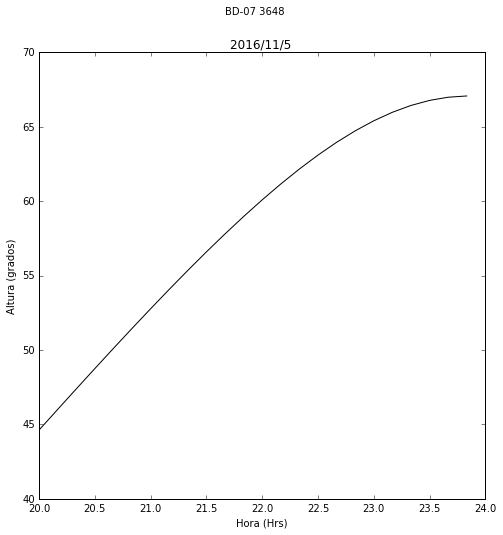

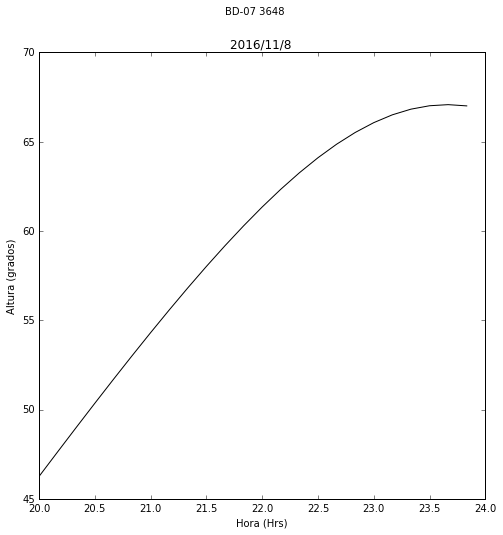

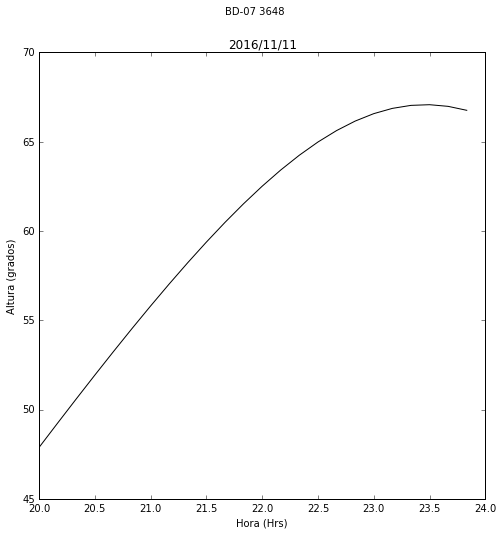

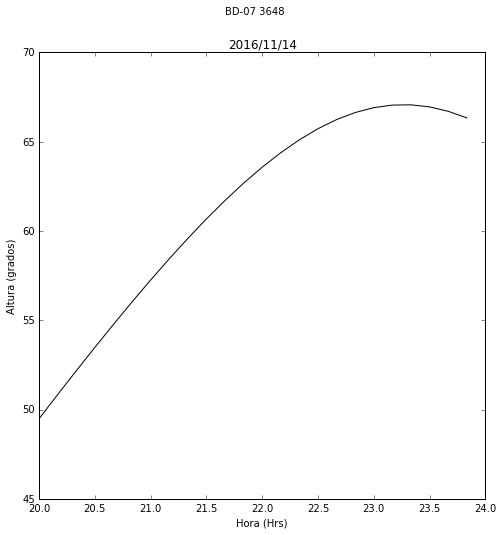

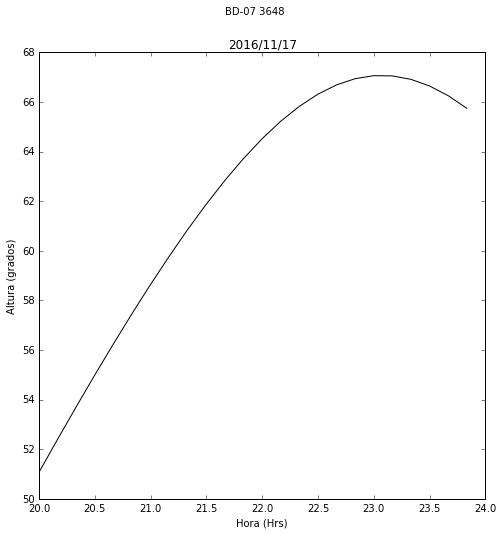

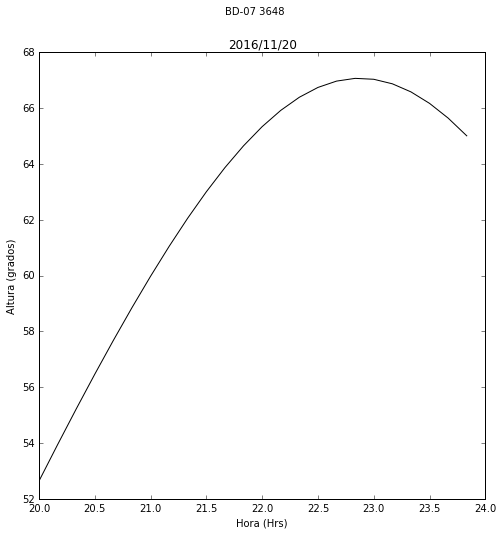

In [7]:
RA = [[155.541,"HD89849"],[203.727,"BD-07 3648"]]
DEC = [[6.21829,"HD89849"],[-8.44247,"BD-07 3648"]]

SantaMartina = ephem.Observer()
SantaMartina.lon =  ephem.degrees('289.4656')
SantaMartina.lat = ephem.degrees('-33.2692')
SantaMartina.elevation = 1450
star = ephem.FixedBody()
for k in range(2): 
    SantaMartina.date = '2016/10/30 19:50:00'
    star._ra = RA[k][0]
    star._dec = DEC[k][0]
    for i in range(7):
        SantaMartina.date += ephem.hour * 72
        Horas=[]
        Altura=[]
        for j in range(24):
            SantaMartina.date += ephem.minute * 10
            star.compute(SantaMartina)
            SM=str(SantaMartina.date)
            Altura.append(trans(str(star.alt)))
            Horas.append(trans(SM[10:]))
    
        sm=SM[:10]
        SantaMartina.date -= ephem.minute * 10 * 24
        
   
        plt.subplots(figsize=(8,8))
        plt.plot(Horas,Altura,'k')
        plt.suptitle(RA[k][1])
        plt.title(sm)
        plt.xlabel("Hora (Hrs)")
        plt.ylabel("Altura (grados)")
        
        plt.show()


Aquí solo grafiqué algunos días durante estas 3 semanas, en el cual se puede apreciar la visibilidad de estos 3 candidatos que escogí anteriormente. arriba de cada gráfico está indicado el nombre de la candidata y la fecha.

**5)**

La cuadratura es el momento en que una estrella forma un ángulo de 90 grados con otra en la línea de visión (puede ser hacia la derecha o la izquierda). En el caso de una binaria, la estrella secundaria está a 90 grados de la estrella principal, es decir, se encuentran en los puntos más alejados posibles entre ellas. Además, en este punto se encuentra la amplitud máxima de la velocidad radial.

El paper de Wraight et al. (2012), contiene los tiempos en que ocurren los mid-eclipses en Modified Julian Days (MJD), y el periodo de cada una de ellas y su error. Sin embargo, debo obtener las fechas en días calendario en las que ocurren estos suceso. Para esto utilizaré una calculadora (http://ghiorzi.org/diasjuli.htm).

A continuación, una tabla con lo dicho anteriormente.

| Candidato |     MJD       |     Fecha       |     Periodo (días)  |
|:---------:|:-------------:|:---------------:|:-------------------:|
| HD198044  | 54450.509489  |16/Diciembre/2007|    5.15195±0.0015   |
| HD205403  | 54123.634818  | 23/Enero/2007   |    2.4449±0.0005    |  
| HD222891  | 54150.650434  | 19/Febrero/2007 |    1.59495±0.0004   | 


In [13]:
Dia=16.00900000007823 ## aquí fui cambiando los días que obtuve de la calculadora de dias julianos. Para obtener H,M y S.
Hora= (Dia - int(Dia))*24
Minutos= (Hora - int(Hora))*60
Segundos= (Minutos - int(Minutos))*60
print "Fecha en horas del día ", int(Dia), ":", int(Hora),"/",int(Minutos),"/",int(Segundos)

Fecha en horas del día  16 : 0 / 12 / 57


La cuadratura va a ocurrir en un cuarto del período ($\frac{Periodo}{4}$), entonces: